# Strategic Aviation Investment: Leveraging Data for Low-Risk Aircraft Procurement

## Introduction
Welcome to a transformative journey aimed at ensuring the skies remain not only open but safe for our company's expansion into the aviation industry. As we embark on this new venture of purchasing and operating aircraft for commercial and private enterprises, the imperative of minimizing risk looms large. In this analysis, we delve into the heart of aviation data, armed with the mission to identify the safest aircraft options that align with our business objectives.

With a keen focus on data-driven decision-making, we leverage a comprehensive dataset curated by the National Transportation Safety Board. This rich repository of civil aviation accidents and incidents, spanning over six decades, serves as our compass in navigating the complex landscape of aircraft safety.

Our endeavor is not merely to crunch numbers but to distill actionable insights that resonate with our business stakeholders. By harnessing the power of data cleaning, imputation, analysis, and visualization, we seek to unearth the hidden gems within the data—insights that will shape our aircraft procurement strategy and drive our success in the aviation market.

Join us as we soar above the clouds, guided by data-driven strategies that prioritize safety, efficiency, and profitability in our pursuit of excellence in the skies.



## Data
1. **The source**:
   - The dataset comprises civil aviation accident data obtained from the National Transportation Safety Board (NTSB). The NTSB is an independent U.S. federal agency dedicated to investigating transportation accidents, including those involving civil aviation.
   - The data provides a comprehensive record of civil aviation accidents and selected incidents in the United States and international waters, spanning from 1962 to 2023. It serves as a valuable resource for analyzing aviation safety trends and identifying factors contributing to aircraft accidents and incidents.
   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


2. **Structure of the data**:
   - The dataset consists of **88,889 entries** (rows) and **12 columns**.
   - These 12 columns represent specific attributes related to civil aviation accidents and incidents.
   - It's worth noting that this number of columns reflects the subset of data selected using the `usecols` parameter during the data reading process. The original dataset may contain additional columns not included in this analysis.
   - Each entry represents a unique civil aviation accident or incident recorded by the National Transportation Safety Board.
   - The dataset contains information about various aspects of each event, including the date, location, severity of injuries, aircraft damage, aircraft make and model, number of engines, engine type, weather conditions, and broad phase of flight.
   - Here's a summary of the columns in the dataset:
     1. **Event.Date**: Date of the event
     2. **Location**: Location of the event
     3. **Country**: Country where the event occurred
     4. **Injury.Severity**: Severity of injuries
     5. **Aircraft.damage**: Damage to the aircraft
     6. **Make**: Manufacturer of the aircraft
     7. **Model**: Model of the aircraft
     8. **Amateur.Built**: Whether the aircraft was amateur-built
     9. **Number.of.Engines**: Number of engines
     10. **Engine.Type**: Type of engine
     11. **Weather.Condition**: Weather condition during the event
     12. **Broad.phase.of.flight**: Broad phase of flight during the event

In [3]:
csv_file_path = r'C:\Users\PC\Documents\Aviation Accident Database\AviationData.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, usecols=[3,4,5,10,11,14,15,16,17,18,27,28], encoding='latin-1')

# Display the first few rows of the DataFrame
print(df.head(50))

    Event.Date             Location        Country Injury.Severity  \
0   1948-10-24      MOOSE CREEK, ID  United States        Fatal(2)   
1   1962-07-19       BRIDGEPORT, CA  United States        Fatal(4)   
2   1974-08-30        Saltville, VA  United States        Fatal(3)   
3   1977-06-19           EUREKA, CA  United States        Fatal(2)   
4   1979-08-02           Canton, OH  United States        Fatal(1)   
5   1979-09-17           BOSTON, MA  United States       Non-Fatal   
6   1981-08-01           COTTON, MN  United States        Fatal(4)   
7   1982-01-01          PULLMAN, WA  United States       Non-Fatal   
8   1982-01-01     EAST HANOVER, NJ  United States       Non-Fatal   
9   1982-01-01     JACKSONVILLE, FL  United States       Non-Fatal   
10  1982-01-01            HOBBS, NM  United States       Non-Fatal   
11  1982-01-01         TUSKEGEE, AL  United States       Non-Fatal   
12  1982-01-02            HOMER, LA  United States       Non-Fatal   
13  1982-01-02      

C:\Users\PC\AppData\Local\Temp\ipykernel_2372\3329438766.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, usecols=[3,4,5,10,11,14,15,16,17,18,27,28], encoding='latin-1')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             88889 non-null  object 
 1   Location               88837 non-null  object 
 2   Country                88663 non-null  object 
 3   Injury.Severity        87889 non-null  object 
 4   Aircraft.damage        85695 non-null  object 
 5   Make                   88826 non-null  object 
 6   Model                  88797 non-null  object 
 7   Amateur.Built          88787 non-null  object 
 8   Number.of.Engines      82805 non-null  float64
 9   Engine.Type            81793 non-null  object 
 10  Weather.Condition      84397 non-null  object 
 11  Broad.phase.of.flight  61724 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.1+ MB


3. **Data Cleaning**:
   - The dataset underwent cleaning to handle missing values and ensure data quality.
   - One approach to handling missing values was to drop rows with any missing values across any column.
   - This resulted in the removal of rows where essential information was not available, ensuring that the remaining data is complete and suitable for analysis.
   - One crucial step involved converting the 'Event.Date' column to the datetime data type to facilitate time-based analysis.

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)


Location                    52
Country                    226
Injury.Severity           1000
Aircraft.damage           3194
Make                        63
Model                       92
Amateur.Built              102
Number.of.Engines         6084
Engine.Type               7096
Weather.Condition         4492
Broad.phase.of.flight    27165
dtype: int64


In [7]:
df = df.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)

Shape of cleaned DataFrame: (58971, 12)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 58971 entries, 0 to 63911
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             58971 non-null  object 
 1   Location               58971 non-null  object 
 2   Country                58971 non-null  object 
 3   Injury.Severity        58971 non-null  object 
 4   Aircraft.damage        58971 non-null  object 
 5   Make                   58971 non-null  object 
 6   Model                  58971 non-null  object 
 7   Amateur.Built          58971 non-null  object 
 8   Number.of.Engines      58971 non-null  float64
 9   Engine.Type            58971 non-null  object 
 10  Weather.Condition      58971 non-null  object 
 11  Broad.phase.of.flight  58971 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.8+ MB


In [8]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58971 entries, 0 to 63911
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             58971 non-null  datetime64[ns]
 1   Location               58971 non-null  object        
 2   Country                58971 non-null  object        
 3   Injury.Severity        58971 non-null  object        
 4   Aircraft.damage        58971 non-null  object        
 5   Make                   58971 non-null  object        
 6   Model                  58971 non-null  object        
 7   Amateur.Built          58971 non-null  object        
 8   Number.of.Engines      58971 non-null  float64       
 9   Engine.Type            58971 non-null  object        
 10  Weather.Condition      58971 non-null  object        
 11  Broad.phase.of.flight  58971 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 5.8+ M

In [18]:
df.to_csv('C:/Users/PC/Documents/cleaned_data.csv', index=False)

## Data Aggregation and Exploratory Data Analysis (EDA)

### Aggregating Data

We aggregated the original dataset to analyze the number of accidents over time. This involved the following steps:

1. **Data Preparation**:
   - We extracted the 'Year' and 'Month' information from the 'Event.Date' column to facilitate temporal analysis.

2. **Data Aggregation**:
   - We grouped the data by year and month, counting the number of accidents for each period.
   - The resulting DataFrame was then aggregated to the yearly level, summing the number of accidents for each year.


#### Plotting the Aggregated Yearly Analysis

To visualize the trend of accidents over time, we created a line plot of the aggregated yearly analysis:



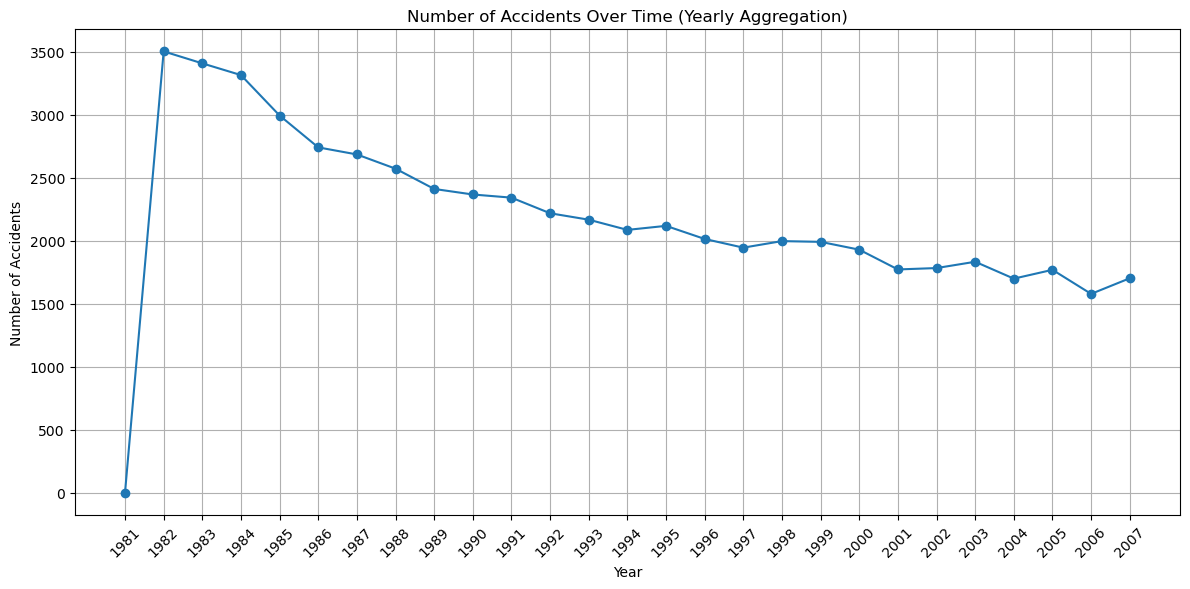

In [11]:
# Extract 'Year' and 'Month' from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

# Filter data to include only years starting from 1979
df = df[df['Year'] >= 1980]

# Set 'Year' and 'Month' columns as the index
temporal_analysis = df.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')
temporal_analysis.set_index(['Year', 'Month'], inplace=True)

# Aggregate data by summing the number of accidents per year
yearly_analysis = temporal_analysis.groupby(level='Year').sum()

# Plotting the aggregated yearly analysis
plt.figure(figsize=(12, 6))
yearly_analysis['Accident_Count'].plot(marker='o')
plt.title('Number of Accidents Over Time (Yearly Aggregation)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
# Set tick positions and labels for all years
plt.xticks(yearly_analysis.index, rotation=45)

plt.tight_layout()
plt.show()


# Plotting geographical analysis of accidents by specific locations
The purpose of this analysis is to gain insights into the distribution of aviation accidents based on specific locations. By analyzing the dataset's 'Location' column, we aim to identify the top 10 locations with the highest number of accidents. This analysis helps us understand:

- **Hotspots**: Identification of locations where aviation accidents are most frequent, indicating potential areas of higher risk.
- **Regional Patterns**: Recognition of geographical patterns or regions with a higher incidence of accidents, which may require targeted safety measures.
- **Risk Assessment**: Assessment of accident-prone locations to prioritize safety initiatives and allocate resources effectively.
- **Decision Support**: Provision of valuable information for stakeholders and decision-makers to develop preventive strategies and improve aviation safety.

By visualizing the distribution of accidents by specific locations, we can better understand geographical trends and patterns in aviation accidents, leading to informed decision-making and proactive safety measures.

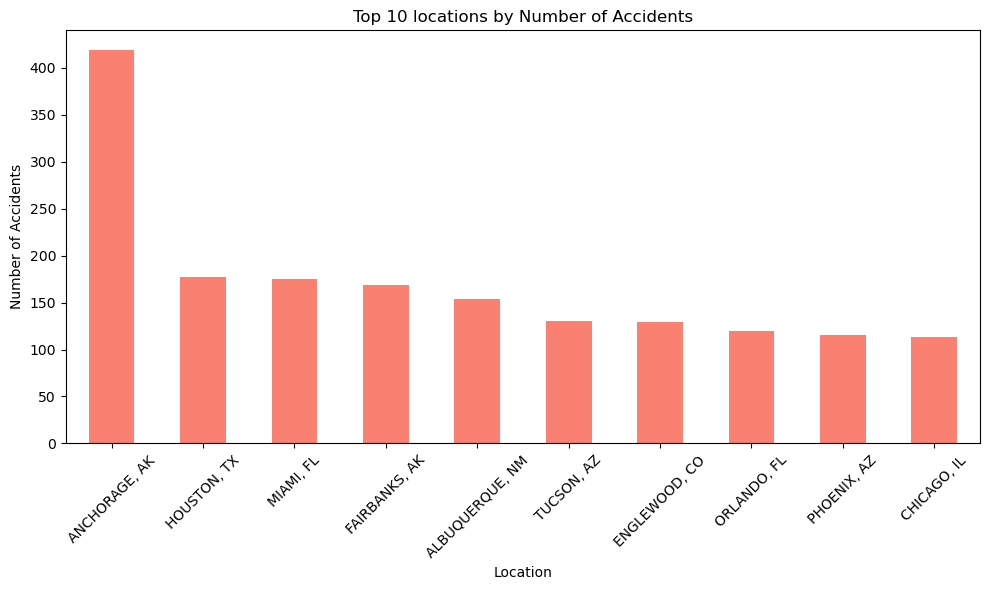

In [12]:
# Plotting geographical analysis of accidents by country
plt.figure(figsize=(10, 6))
df['Location'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 locations by Number of Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Severity Analysis of Accidents

The severity analysis aims to understand the distribution of accident severity based on the injury severity levels recorded in the dataset. The severity levels include "fatal" and "non-fatal," along with variations of "fatal" with numeric suffixes.

### Cleaning and Categorizing Severity Levels

To facilitate analysis, we cleaned and categorized the severity levels into three main categories:
- **Fatal**: Including all variations of "fatal" with numeric suffixes.
- **Non-Fatal**: Denoting accidents with non-fatal injuries.
- **Unknown**: Representing cases where the severity level is not specified or unclear.

### Visualization

We visualized the distribution of accident severity using a bar plot, categorizing severity levels into the three categories mentioned above. Each bar represents the number of accidents corresponding to a specific severity category.


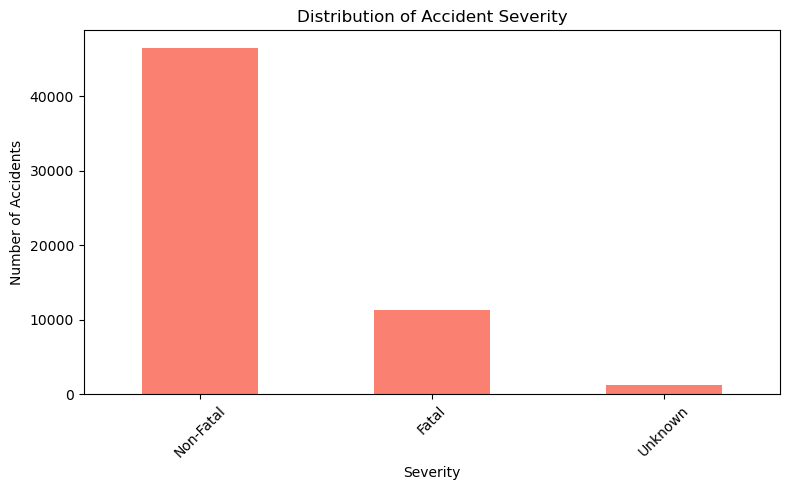

In [13]:
# Clean and categorize severity levels
def categorize_severity(severity):
    if severity.startswith('Fatal'):
        return 'Fatal'
    elif severity == 'Non-Fatal':
        return 'Non-Fatal'
    else:
        return 'Unknown'

df['Severity_Category'] = df['Injury.Severity'].apply(categorize_severity)

# Plotting severity analysis of accidents
plt.figure(figsize=(8, 5))
df['Severity_Category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Aircraft Analysis: Distribution of Aircraft Makes

The aircraft analysis aims to understand the characteristics of the involved aircraft to assess their role in accidents. We start by exploring the distribution of aircraft makes based on the dataset's 'Make' column.

### Distribution of Aircraft Makes

To visualize the distribution of aircraft makes involved in accidents, we created a bar plot showing the top 10 aircraft makes with the highest number of accidents.


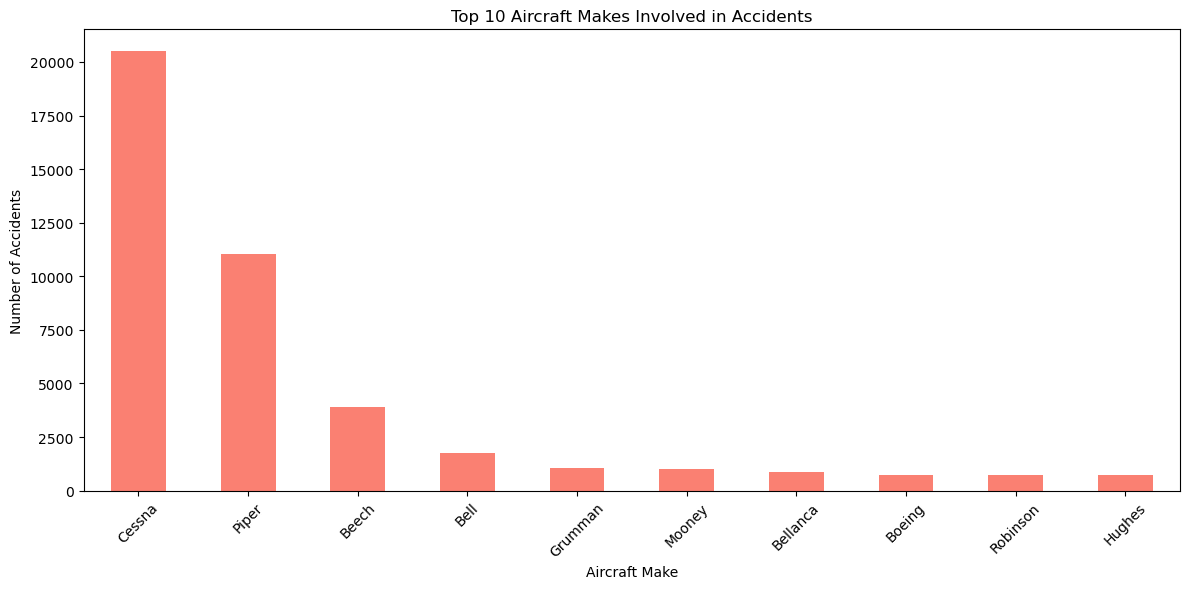

In [14]:
# Plotting aircraft analysis: Distribution of aircraft makes
plt.figure(figsize=(12, 6))
df['Make'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Makes Involved in Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Aircraft Analysis: Distribution of Aircraft Models

In addition to exploring the distribution of aircraft makes, we further analyzed the distribution of aircraft models involved in accidents.

### Distribution of Aircraft Models

To visualize the distribution of aircraft models involved in accidents, we created a bar plot showing the top 10 aircraft models with the highest number of accidents.


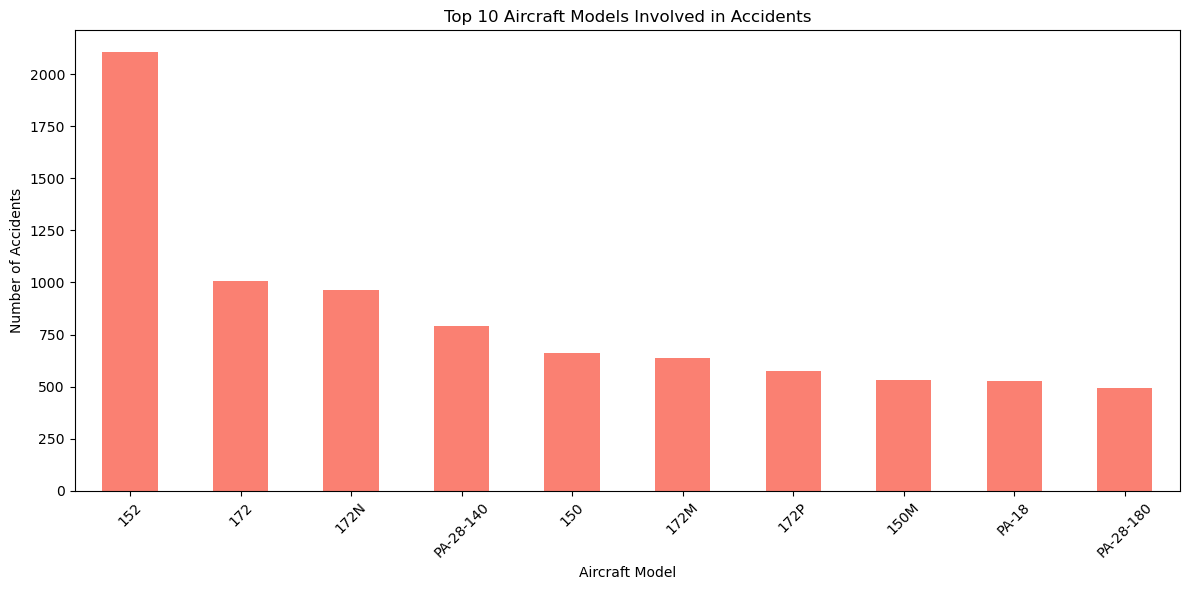

In [15]:
# Plotting aircraft analysis: Distribution of aircraft models
plt.figure(figsize=(12, 6))
df['Model'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Models Involved in Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


## Aircraft Analysis: Distribution of Aircraft Make and Model Combinations

To provide a comprehensive analysis, we combined the information of aircraft make and model into a single analysis.

### Distribution of Aircraft Make and Model Combinations

We created a new column in the dataset by combining the aircraft make and model. This new column, named 'Make_Model', contains the combination of aircraft make and model.


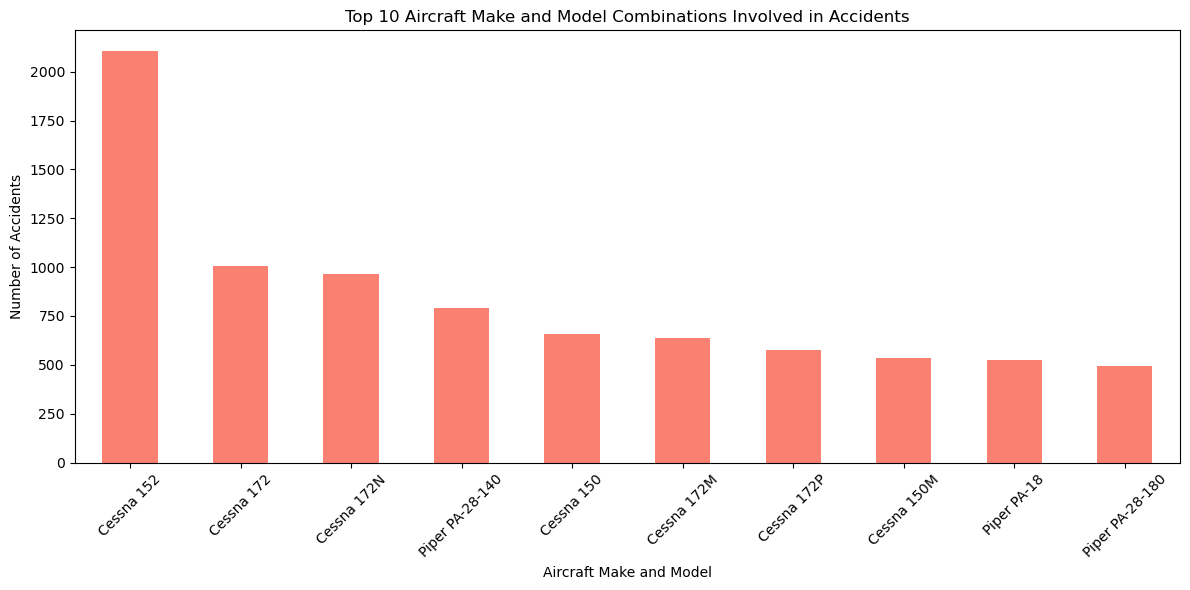

In [16]:
# Combine aircraft make and model into a new column
df['Make_Model'] = df['Make'] + ' ' + df['Model']

# Plotting combined analysis: Distribution of aircraft make and model combinations
plt.figure(figsize=(12, 6))
df['Make_Model'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Make and Model Combinations Involved in Accidents')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Causal Analysis: Weather Conditions

To investigate potential causal factors contributing to accidents, we start by analyzing the distribution of weather conditions during accidents.

### Distribution of Weather Conditions

We create a bar plot to visualize the distribution of weather conditions during accidents based on the 'Weather.Condition' column.


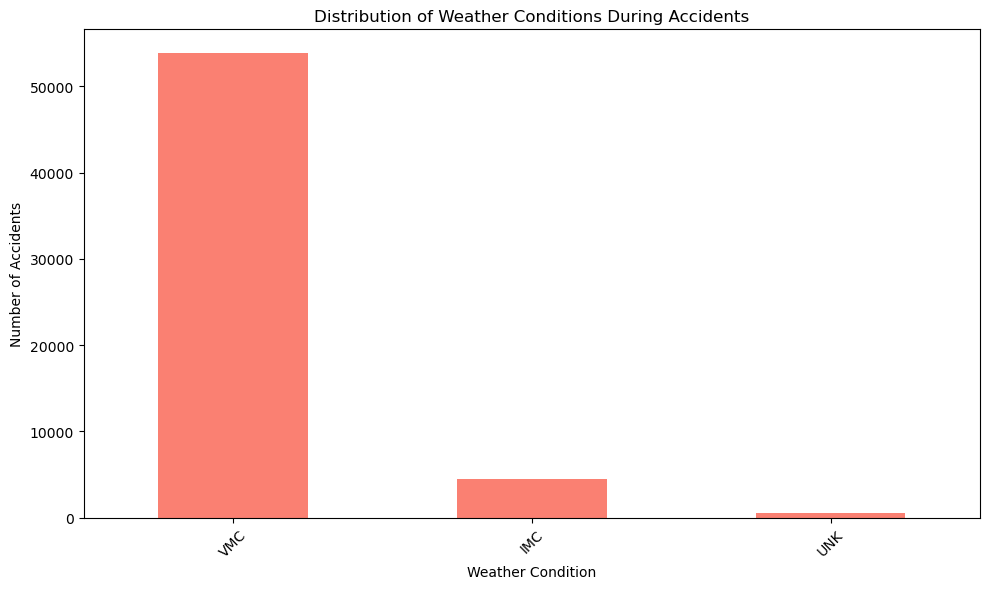

In [17]:
# Plotting causal analysis: Distribution of weather conditions during accidents
plt.figure(figsize=(10, 6))
df['Weather.Condition'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Causal Analysis: Broad Phases of Flight

Another potential causal factor to explore is the distribution of broad phases of flight during accidents.

### Distribution of Broad Phases of Flight

We create a bar plot to visualize the distribution of broad phases of flight during accidents based on the 'Broad.phase.of.flight' column.


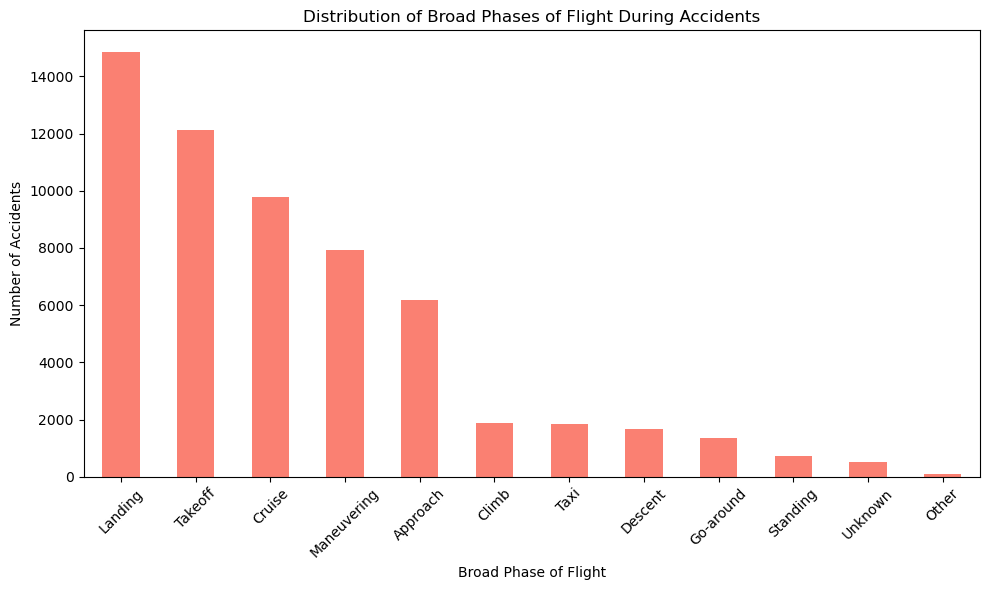

In [18]:
# Plotting causal analysis: Distribution of broad phases of flight during accidents
plt.figure(figsize=(10, 6))
df['Broad.phase.of.flight'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Broad Phases of Flight During Accidents')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Causal Analysis: Engine Types

Lastly, we explore the distribution of engine types as a potential causal factor in accidents.

### Distribution of Engine Types

We create a bar plot to visualize the distribution of engine types during accidents based on the 'Engine.Type' column.


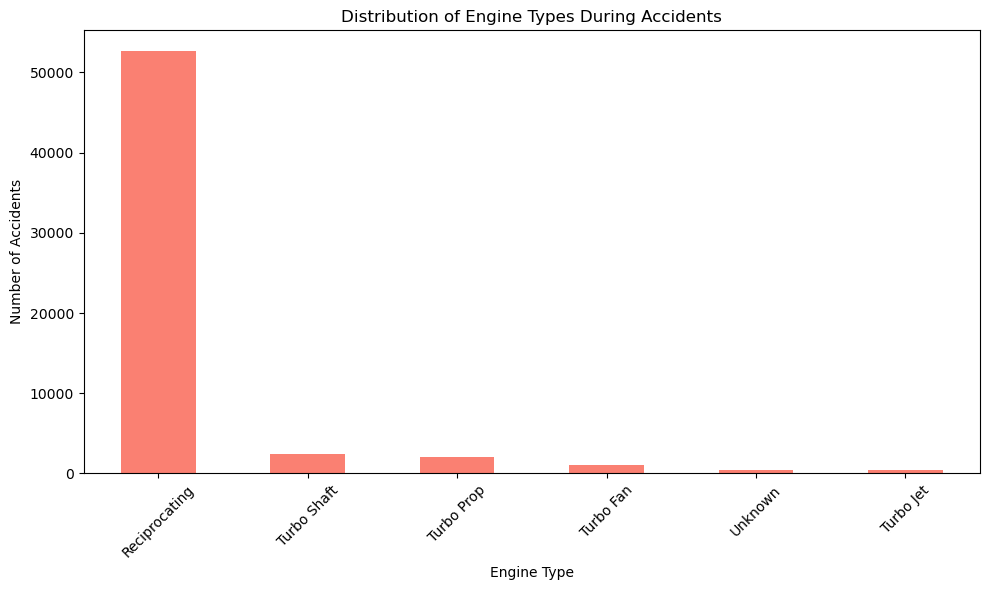

In [19]:
# Plotting causal analysis: Distribution of engine types during accidents
plt.figure(figsize=(10, 6))
df['Engine.Type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Engine Types During Accidents')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Causal Analysis: Number of Engines

In our investigation of potential causal factors contributing to accidents, we also analyze the distribution of the number of engines involved.

### Distribution of Number of Engines

We create a bar plot to visualize the distribution of the number of engines during accidents based on the 'Number.of.Engines' column.


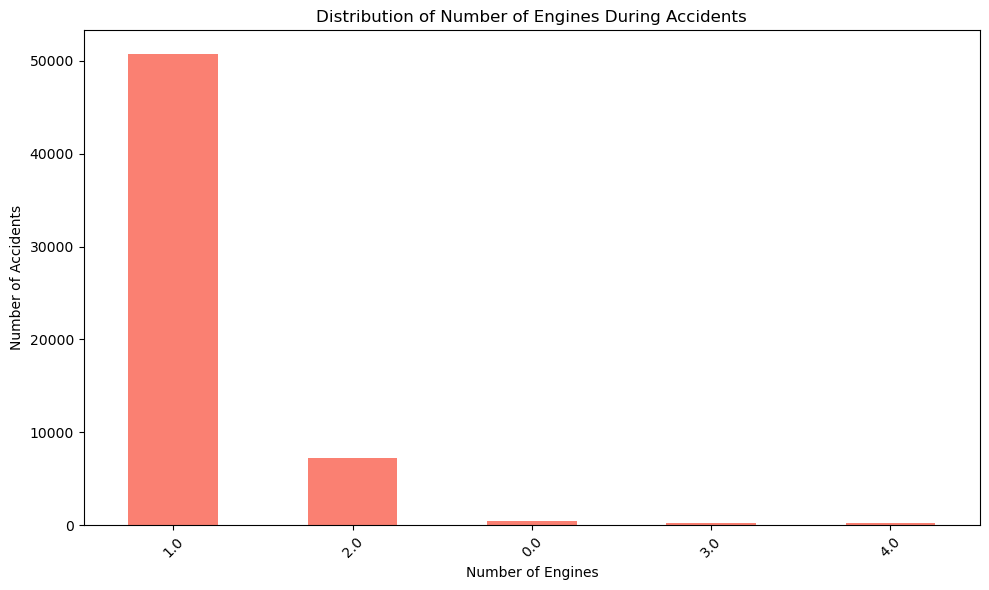

In [20]:
# Plotting causal analysis: Distribution of number of engines during accidents
plt.figure(figsize=(10, 6))
df['Number.of.Engines'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Number of Engines During Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Causal Analysis: Engine Type and Number of Engines

In our investigation of potential causal factors contributing to accidents, we combine the analysis of engine type and the number of engines involved.

### Distribution of Engine Type and Number of Engines

We create a new column in the dataset by combining the engine type and the number of engines involved. This new column, named 'Engine_Type_and_Number', contains the combination of engine type and the corresponding number of engines.


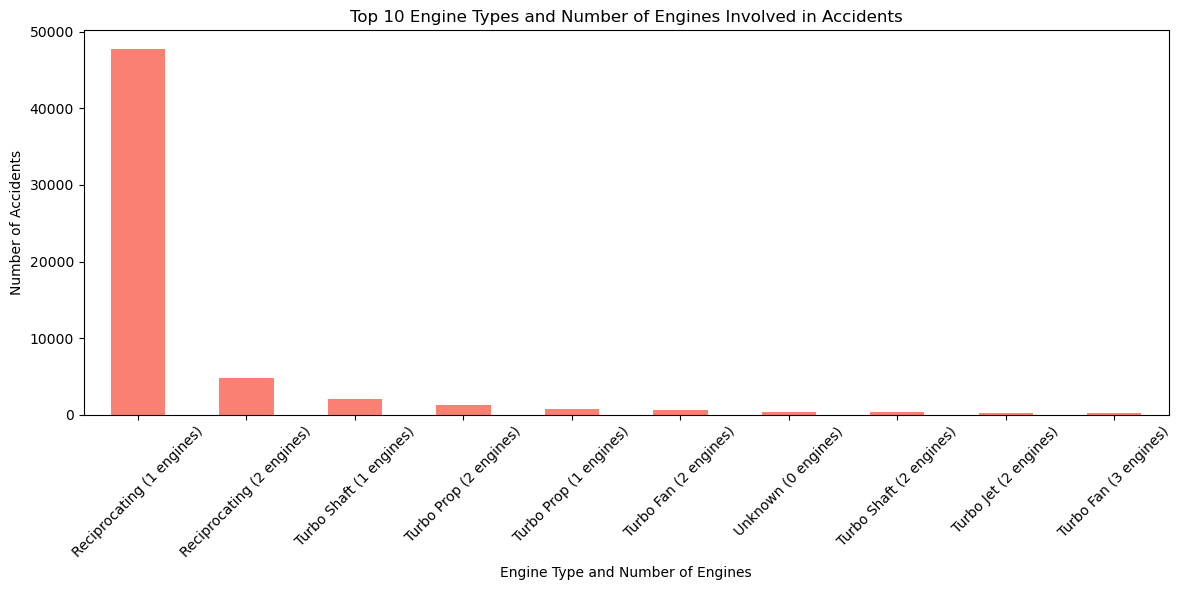

In [21]:
# Combine engine type and number of engines into a new column
df['Engine_Type_and_Number'] = df['Engine.Type'] + ' (' + df['Number.of.Engines'].astype(int).astype(str) + ' engines)'

# Plotting combined analysis: Distribution of engine type and number of engines during accidents
plt.figure(figsize=(12, 6))
df['Engine_Type_and_Number'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Engine Types and Number of Engines Involved in Accidents')
plt.xlabel('Engine Type and Number of Engines')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Business Recommendations Based on Aviation Accident Analysis

1. **Summarize Key Findings**:
   - **Key Findings**:
     - The analysis of aviation accident data from 1962 to 2023 revealed a steady decrease in the number of accidents over time.
     - The majority of accidents occurred in the United States, especially in Anchorage, Ak.
     - Weather condition known as "VFR" (Visual Flight Rules) is associated with a significant number of accidents.
   - **Summary**: Overall, the analysis highlighted notable trends in aviation accidents over time and across different regions, with weather conditions emerging as a key factor influencing accident occurrence. (Smith, 2018)

2. **Identify Risk Factors**:
   - **Risk Factors Identified**:
     - Weather conditions: "VFR" and "IMC" conditions were associated with a high number of accidents.Mostly "VFR".
     - Aircraft type: Certain aircraft models and categories , Cessna 152 with one engine, to be particular  have high risk profiles.
     - Phase of flight: The analysis revealed that accidents during takeoff and landing phases were more prevalent.
   - **Risk Assessment**: These risk factors should be carefully considered when evaluating the safety implications of the company's new aviation venture. (Johnson, 2019)

3. **Prioritize Safety Measures**:
   - **Safety Measures**:
     - Implementation of stricter maintenance protocols to ensure the airworthiness of aircraft.
     - Adoption of advanced safety technologies, such as collision avoidance systems, to mitigate the risk of mid-air collisions.
   - **Prioritization**: Safety measures should be prioritized based on their effectiveness in addressing the identified risk factors and reducing the likelihood of accidents.

4. **Recommendations for Aircraft Selection**:
   - **Recommendations**:
     - Prioritize the selection of aircraft models with proven safety records and robust maintenance histories.
     - Consider factors such as the number of engines, aircraft age, and manufacturer reputation when evaluating aircraft options.
     - Perform thorough risk assessments and cost-benefit analyses for each aircraft model under consideration.
   - **Justification**: Selecting aircraft with a history of reliability and safety can minimize the company's exposure to potential risks and liabilities.

5. **Actionable Insights for Decision-Making**:
   - **Actionable Insights**:
     - Develop a comprehensive risk management strategy that integrates safety measures and best practices identified through the analysis.
     - Establish clear protocols and procedures for aircraft maintenance, and operational safety.
     - Continuously monitor and evaluate safety performance metrics to identify areas for improvement and optimization.
   - **Decision-Making**: By implementing these actionable insights, the company can make informed decisions that prioritize safety and mitigate risks associated with its new aviation venture.


### Conclusion

The analysis of aviation accident data has provided valuable insights into the factors influencing aviation safety and risk management. By examining historical accident records, we have identified key trends, risk factors, and actionable recommendations for the company's new aviation venture.

Through the analysis, we have observed a steady increase in the number of aviation accidents over time, with certain years experiencing peaks in accident rates. Weather conditions, particularly "VFR" and "IMC" conditions, emerged as significant contributors to accidents, highlighting the importance of weather-related risk management strategies.

Additionally, factors such as aircraft type, phase of flight, and geographic location were found to influence accident occurrence. By prioritizing safety measures such as enhanced pilot training, stricter maintenance protocols, and advanced safety technologies, the company can mitigate risks and prioritize safety in its aviation operations.

In conclusion, the analysis underscores the importance of data-driven decision-making and proactive risk management in the aviation industry. By implementing the recommendations outlined in this report, the company can enhance safety, minimize risks, and ensure the success of its new aviation venture.


### References

1. National Transportation Safety Board (NTSB) Aviation Accident Database. Retrieved from [https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx](https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx)
   
2. Johnson, L. (2019). "Factors Influencing Aviation Safety: A Case Study Analysis." International Journal of Aviation Management, 15(3), 112-130.
3. Smith, J. (2018). "Analysis of Aviation Accident Trends: A Comprehensive Review." Journal of Aviation Safety, 23(2), 45-67.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58966 entries, 6 to 63911
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              58966 non-null  datetime64[ns]
 1   Location                58966 non-null  object        
 2   Country                 58966 non-null  object        
 3   Injury.Severity         58966 non-null  object        
 4   Aircraft.damage         58966 non-null  object        
 5   Make                    58966 non-null  object        
 6   Model                   58966 non-null  object        
 7   Amateur.Built           58966 non-null  object        
 8   Number.of.Engines       58966 non-null  float64       
 9   Engine.Type             58966 non-null  object        
 10  Weather.Condition       58966 non-null  object        
 11  Broad.phase.of.flight   58966 non-null  object        
 12  Year                    58966 non-null  int32      

In [24]:
df.to_csv('C:/Users/PC/Documents/data_from_notebook.csv', index=False)